# Центральная предельная теорема для гамма-распределения

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
a = 5.0 # параметр гамма-распределения
rv = sts.gamma(a)

mu = a # матожидание 
sigma2 = a # дисперсия

sample = rv.rvs(1000)

In [3]:
#Построение гистограммы и графика теоретической плотности распределения:

/Users/writex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$x$')

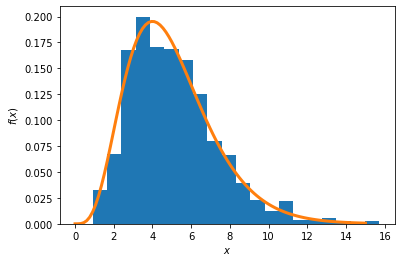

In [4]:
plt.hist(sample, bins=20, normed=True)

x = np.linspace(0,15,100)
pdf = rv.pdf(x)
plt.plot(x, pdf, linewidth=3.0)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Генерация 1000 выборок объема $n$ для $n=$5, 10 и 50:

In [7]:
sample_sizes = np.array([5, 10, 50])
samples = {5:[], 10:[], 50:[]}
for n in sample_sizes:
    for i in range(1000):
        sample = rv.rvs(n)
        samples[n].append(sample)

In [8]:
# параметры нормальных распределений
sigmaz2=dict()
for n in sample_sizes:
    sigmaz2[n]=sigma2/n

print('для n=5: mu=%.2f, sigma2=%.2f' % (mu, sigmaz2[5]))
print('для n=10: mu=%.2f, sigma2=%.2f' % (mu, sigmaz2[10]))
print('для n=50: mu=%.2f, sigma2=%.2f' % (mu, sigmaz2[50]))

# создание соответствующих нормальных распределений
norm_rvz = dict()
for n in sample_sizes:
    norm_rvz[n] = sts.norm(loc=mu, scale=np.sqrt(sigmaz2[n]))

для n=5: mu=5.00, sigma2=1.00
для n=10: mu=5.00, sigma2=0.50
для n=50: mu=5.00, sigma2=0.10


Построение гистограмм выборочных средних и плотностей соответствующих нормальных распределений:

n=5:


/Users/writex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


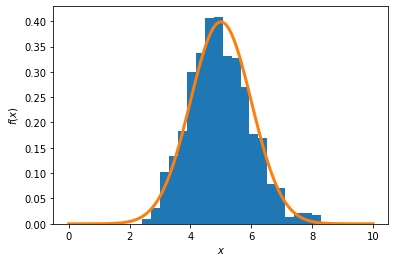

n=10:


/Users/writex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


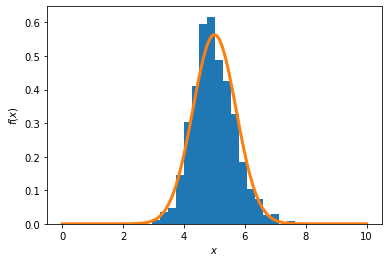

n=50:


/Users/writex/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


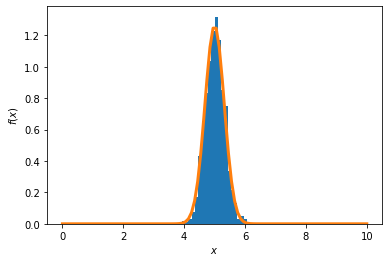

In [10]:
# вычисление выборочных средних
means = {5:[], 10:[], 50:[]}
for n in sample_sizes:
    for sample in samples[n]:
        m = np.mean(sample)
        means[n].append(m)


# построение гистограмм и графиков плотностей разбиения
for n in sample_sizes:
    print("n=%d:" % n)
    plt.hist(means[n], bins=20, normed=True)

    x = np.linspace(0,10,100)
    pdf = norm_rvz[n].pdf(x)
    plt.plot(x, pdf, linewidth=3.0)

    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()